# **Tutorial 7: Other Computational Tools in Xarray**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Danika Gupta, Younkap Nina Duplex, Chi Zhang, Ohad Zivan 

**Content editors:** Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** TBD

**Our 2023 Sponsors:** NASA TOPS





###**Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).

## **Tutorial 7 Objectives**
In previous sessions, we've explored diverse types of climate data through both coding activities and explanatory videos. We've seen firsthand how such data can be both variable and noisy, which poses challenges in comparing datasets and deciphering long-term trends.

In this tutorial, we aim to tackle these challenges by teaching you how to apply several powerful computational tools available in Xarray. These tools include `resample`, `rolling`, and `coarsen`, which are specifically designed for tasks like temporal upsampling and downsampling, calculating moving-window aggregations (like moving averages), and providing generic functionality for data downsampling. 

By the end of this tutorial, you will be equipped with new techniques to clean and interpret climate data, making it easier to identify patterns and trends amidst the noise.

## Imports


In [8]:
!pip install matplotlib.pyplot
!pip install numpy
!pip install xarray
!pip install pythia_datasets
!pip install pandas

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd

Let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [10]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath,decode_times=False)
new_time = pd.date_range(start='2000-01-15', end='2014-12-15', periods=180)
ds = ds.assign(time=new_time)

/Users/chi/miniconda3/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


## High level computation functionality

- `resample`: [Groupby-like functionality specifialized for time dimensions. Can be used for temporal upsampling and downsampling](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `rolling`: [Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen`: [Generic functionality for downsampling data](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)



For example, resample to annual frequency:

In [11]:
r = ds.tos.resample(time='AS')
r

DataArrayResample, grouped over '__resample_dim__'
15 groups with labels 2000-01-01, ..., 2014-01-01.

In [12]:
r.mean()

<xarray.DataArray 'tos' (time: 15, lat: 180, lon: 360)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7474419, -1.7474264, -1.7474008, ..., -1.7474308,
         -1.7474365, -1.7474445],
        [-1.7424874, -1.7424612, -1.7424251, ..., -1.742536 ,
         -1.7425283, -1.7425116],
        [-1.7382039, -1.7381679, -1.7381277, ..., -1.7383199,
         -1.7382846, -1.7382454]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6902231, -1.6899008, -1.6895409, ..., -1.6910189,
         -1.6907759, -1.6905178],
        [-1.6879102, -1.6876906, -1.6874666, ..., -1.6885366,
         -1.6883289, -1.688121 ],
        [-1.6883243, -1.6881752, -1.6880217, ..., -1.6886654,
         -1.6885542, -1.6884427]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6893266, -1.6893964, -1.6894479, ..., -1.6889572,
         -1.6890831, -1.6892204],
        [-1.6776317, -1.6777302, -1.6778082, ..., -1.6771463,
         -1.6773272, -1.677492 ],
        [-1.672563 , -1.6726688, -1.6727766, ..., -1.6723493,
         -1.6724195, -1.6724887]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2014-01-01
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Compute a 5-month moving average:

In [13]:
m_avg = ds.tos.rolling(time=5, center=True).mean()
m_avg

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

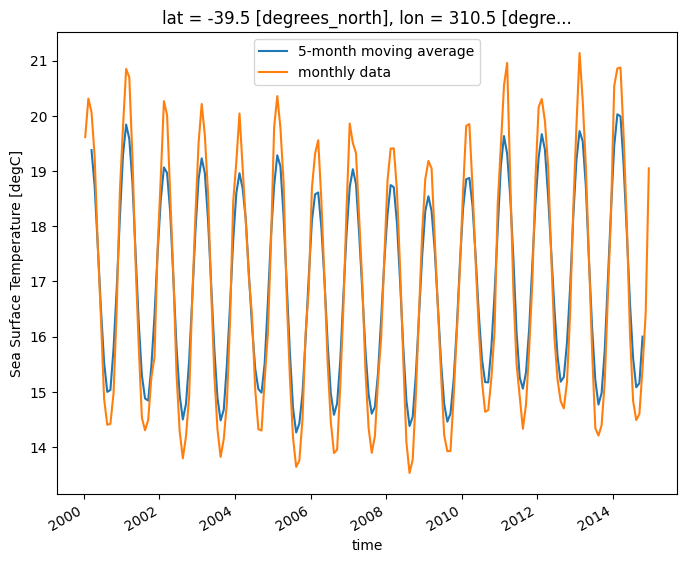

In [15]:
lat = 50
lon = 310

m_avg.isel(lat=lat, lon=lon).plot(size=6)
ds.tos.isel(lat=lat, lon=lon).plot()
plt.legend(['5-month moving average', 'monthly data']);

## Climate Connection 

Explain the use of moving averages in the context of a global temperature anomaly graph. How can this technique aid in visualizing long-term trends?

<details>
<summary>Click here to see the answer</summary>
    
>_Answer_: A moving average, in the context of a global temperature anomaly graph, represents the average temperature anomaly over a certain period (like 5 years), calculated as the graph progresses through time. This technique helps in visualizing long-term trends by smoothing out short-term fluctuations or noise in the data. As a result, we get a cleaner, clearer depiction of the overall trend in temperature changes over time.

</details>

## Summary

In this tutorial, we've explored Xarray tools to simplify and understand climate data better. Given the complexity and variability of climate data, tools like `resample`, `rolling`, and `coarsen` come handy in making the data easier to compare and find long-term trends. We've also looked at valuable techniques like calculating moving averages. 



